## Oil and Gas Forecast for North American Market

In [34]:
import pandas as pd
import seaborn as sns

In [35]:
# Import the data already retrived from the API
df_oil = pd.read_csv("/Users/boluwatifeoduyemi/Documents/Data Science/SPE DSMP/Oil and Gas Analytics Dashboard/oil_production_data.csv")
df_oil.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-12,SFL,FLORIDA,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,63,MBBL
1,2024-11,SFL,FLORIDA,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,65,MBBL
2,2024-10,SFL,FLORIDA,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,67,MBBL
3,2024-09,SFL,FLORIDA,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,71,MBBL
4,2024-08,SFL,FLORIDA,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,80,MBBL


In [36]:
df_oil.shape

(17640, 11)

In [37]:
#Inspect data for any missing values
df_oil.isna().sum()

period                   0
duoarea                  0
area-name             1056
product                  0
product-name             0
process                  0
process-name             0
series                   0
series-description       0
value                    0
units                    0
dtype: int64

From the above, it appears there are **1056 missing data** in the area-name column. Now, let's visualize this in a heatmap to better understand the situation.

In [38]:
missing_data = df_oil[df_oil["area-name"].isnull()]
print(missing_data)

        period duoarea area-name product product-name process  \
12144  2024-12    R3FM       NaN    EPC0    Crude Oil     FPF   
12146  2024-11    R3FM       NaN    EPC0    Crude Oil     FPF   
12148  2024-10    R3FM       NaN    EPC0    Crude Oil     FPF   
12150  2024-09    R3FM       NaN    EPC0    Crude Oil     FPF   
12152  2024-08    R3FM       NaN    EPC0    Crude Oil     FPF   
...        ...     ...       ...     ...          ...     ...   
17635  1981-05     R5F       NaN    EPC0    Crude Oil     FPF   
17636  1981-04     R5F       NaN    EPC0    Crude Oil     FPF   
17637  1981-03     R5F       NaN    EPC0    Crude Oil     FPF   
17638  1981-02     R5F       NaN    EPC0    Crude Oil     FPF   
17639  1981-01     R5F       NaN    EPC0    Crude Oil     FPF   

           process-name     series  \
12144  Field Production  MCRFP3FM1   
12146  Field Production  MCRFP3FM1   
12148  Field Production  MCRFP3FM1   
12150  Field Production  MCRFP3FM1   
12152  Field Production  MCRF

In [39]:
df_oil['area-name'].value_counts()

area-name
FLORIDA       528
NEW YORK      528
CALIFORNIA    528
USA-AZ        528
USA-AK        528
USA-WY        528
USA-UT        528
USA-MT        528
COLORADO      528
TEXAS         528
USA-NM        528
USA-MS        528
USA-LA        528
USA-AR        528
USA-TN        528
USA-AL        528
USA-SD        528
USA-OK        528
OHIO          528
USA-ND        528
USA-NE        528
USA-MO        528
USA-MI        528
USA-KY        528
USA-KS        528
USA-IN        528
USA-IL        528
USA-WV        528
USA-VA        528
USA-PA        528
USA-NV        528
USA-ID        216
Name: count, dtype: int64

In [40]:
df_oil['area-name'].unique()

array(['FLORIDA', 'NEW YORK', 'USA-PA', 'USA-VA', 'USA-WV', 'USA-IL',
       'USA-IN', 'USA-KS', 'USA-KY', 'USA-MI', 'USA-MO', 'USA-NE',
       'USA-ND', 'OHIO', 'USA-OK', 'USA-SD', 'USA-AL', 'USA-TN', 'USA-AR',
       'USA-LA', 'USA-MS', 'USA-NM', 'TEXAS', nan, 'COLORADO', 'USA-ID',
       'USA-MT', 'USA-UT', 'USA-WY', 'USA-AK', 'USA-AZ', 'CALIFORNIA',
       'USA-NV'], dtype=object)

In [41]:
df_oil['area-name'].nunique()

32

In [42]:
df_oil['duoarea'].unique()

array(['SFL', 'SNY', 'SPA', 'SVA', 'SWV', 'SIL', 'SIN', 'SKS', 'SKY',
       'SMI', 'SMO', 'SNE', 'SND', 'SOH', 'SOK', 'SSD', 'SAL', 'STN',
       'SAR', 'SLA', 'SMS', 'SNM', 'STX', 'R3FM', 'SCO', 'SID', 'SMT',
       'SUT', 'SWY', 'SAK', 'SAZ', 'SCA', 'SNV', 'R5F'], dtype=object)

In [43]:
# Drop rows where 'area-name' is missing
df_oil = df_oil.dropna(subset=['area-name'])

# Verify the changes
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16584 entries, 0 to 17111
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              16584 non-null  object
 1   duoarea             16584 non-null  object
 2   area-name           16584 non-null  object
 3   product             16584 non-null  object
 4   product-name        16584 non-null  object
 5   process             16584 non-null  object
 6   process-name        16584 non-null  object
 7   series              16584 non-null  object
 8   series-description  16584 non-null  object
 9   value               16584 non-null  int64 
 10  units               16584 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [44]:
df_oil['area-name'].unique()

array(['FLORIDA', 'NEW YORK', 'USA-PA', 'USA-VA', 'USA-WV', 'USA-IL',
       'USA-IN', 'USA-KS', 'USA-KY', 'USA-MI', 'USA-MO', 'USA-NE',
       'USA-ND', 'OHIO', 'USA-OK', 'USA-SD', 'USA-AL', 'USA-TN', 'USA-AR',
       'USA-LA', 'USA-MS', 'USA-NM', 'TEXAS', 'COLORADO', 'USA-ID',
       'USA-MT', 'USA-UT', 'USA-WY', 'USA-AK', 'USA-AZ', 'CALIFORNIA',
       'USA-NV'], dtype=object)

In [45]:
#Let's check again for any missing values
df_oil.isna().sum()

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64

<Axes: title={'center': 'Missing Data'}>

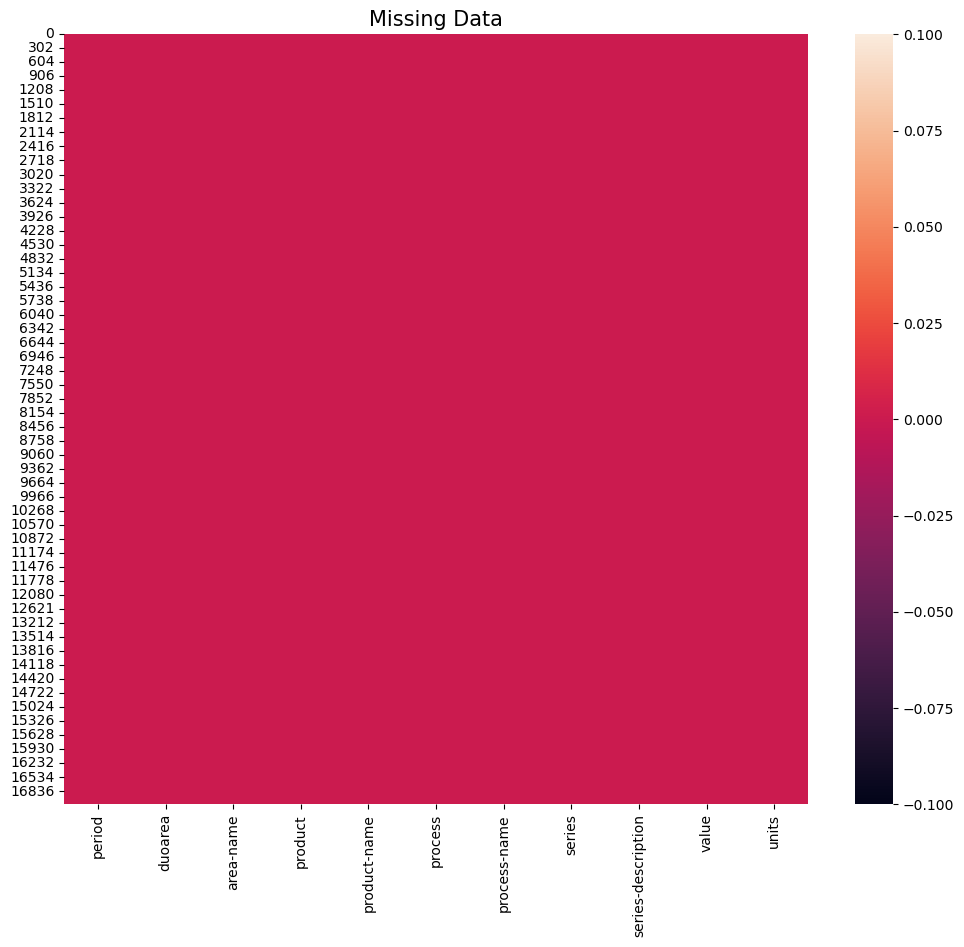

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.title('Missing Data', fontsize=15)
sns.heatmap(df_oil.isnull())

## Map Plots to Visualize the Production Data of each State

In [47]:
import geopandas as gpd

countries = gpd.read_file('/Users/boluwatifeoduyemi/Documents/Data Science/Python Packages/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [48]:
states_prov = gpd.read_file('/Users/boluwatifeoduyemi/Documents/Data Science/Python Packages/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')
states_prov.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [49]:
states_prov['iso_3166_2'].unique()

array(['US-MN', 'US-MT', 'US-ND', 'US-HI', 'US-ID', 'US-WA', 'US-AZ',
       'US-CA', 'US-CO', 'US-NV', 'US-NM', 'US-OR', 'US-UT', 'US-WY',
       'US-AR', 'US-IA', 'US-KS', 'US-MO', 'US-NE', 'US-OK', 'US-SD',
       'US-LA', 'US-TX', 'US-CT', 'US-MA', 'US-NH', 'US-RI', 'US-VT',
       'US-AL', 'US-FL', 'US-GA', 'US-MS', 'US-SC', 'US-IL', 'US-IN',
       'US-KY', 'US-NC', 'US-OH', 'US-TN', 'US-VA', 'US-WI', 'US-WV',
       'US-DE', 'US-DC', 'US-MD', 'US-NJ', 'US-NY', 'US-PA', 'US-ME',
       'US-MI', 'US-AK'], dtype=object)

In [50]:
states_prov['name'].unique()

array(['Minnesota', 'Montana', 'North Dakota', 'Hawaii', 'Idaho',
       'Washington', 'Arizona', 'California', 'Colorado', 'Nevada',
       'New Mexico', 'Oregon', 'Utah', 'Wyoming', 'Arkansas', 'Iowa',
       'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
       'Louisiana', 'Texas', 'Connecticut', 'Massachusetts',
       'New Hampshire', 'Rhode Island', 'Vermont', 'Alabama', 'Florida',
       'Georgia', 'Mississippi', 'South Carolina', 'Illinois', 'Indiana',
       'Kentucky', 'North Carolina', 'Ohio', 'Tennessee', 'Virginia',
       'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
       'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine',
       'Michigan', 'Alaska'], dtype=object)

In [51]:
df_oil['area-name'].unique()

array(['FLORIDA', 'NEW YORK', 'USA-PA', 'USA-VA', 'USA-WV', 'USA-IL',
       'USA-IN', 'USA-KS', 'USA-KY', 'USA-MI', 'USA-MO', 'USA-NE',
       'USA-ND', 'OHIO', 'USA-OK', 'USA-SD', 'USA-AL', 'USA-TN', 'USA-AR',
       'USA-LA', 'USA-MS', 'USA-NM', 'TEXAS', 'COLORADO', 'USA-ID',
       'USA-MT', 'USA-UT', 'USA-WY', 'USA-AK', 'USA-AZ', 'CALIFORNIA',
       'USA-NV'], dtype=object)

In [52]:
# Replace 'USA' with 'US' in the 'area-name' column
df_oil['area-name'] = df_oil['area-name'].str.replace('USA', 'US', regex=False)

# Define a mapping of state names to their abbreviations
state_abbreviations = {
    'FLORIDA': 'FL',
    'NEW YORK': 'NY',
    'TEXAS': 'TX',
    'COLORADO': 'CO',
    'CALIFORNIA': 'CA',
    'OHIO': 'OH'
}

# Replace state names with the format 'US-(state abbreviation)'
df_oil['area-name'] = df_oil['area-name'].replace(state_abbreviations, regex=False)
df_oil['area-name'] = df_oil['area-name'].apply(lambda x: f"US-{x}" if x in state_abbreviations.values() else x)

# Display the updated dataframe
df_oil['area-name'].unique()

array(['US-FL', 'US-NY', 'US-PA', 'US-VA', 'US-WV', 'US-IL', 'US-IN',
       'US-KS', 'US-KY', 'US-MI', 'US-MO', 'US-NE', 'US-ND', 'US-OH',
       'US-OK', 'US-SD', 'US-AL', 'US-TN', 'US-AR', 'US-LA', 'US-MS',
       'US-NM', 'US-TX', 'US-CO', 'US-ID', 'US-MT', 'US-UT', 'US-WY',
       'US-AK', 'US-AZ', 'US-CA', 'US-NV'], dtype=object)

In [53]:
# Merge df_oil with states_prov based on the common keys
maps_oil = df_oil.merge(states_prov[['iso_3166_2', 'name', 'geometry']], 
                         left_on='area-name', 
                         right_on='iso_3166_2', 
                         how='left')

# Display the merged dataframe
maps_oil

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,iso_3166_2,name,geometry
0,2024-12,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,63,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
1,2024-11,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,65,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
2,2024-10,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,67,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
3,2024-09,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,71,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
4,2024-08,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,80,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16579,1981-05,SNV,US-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,56,MBBL,US-NV,Nevada,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."
16580,1981-04,SNV,US-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,57,MBBL,US-NV,Nevada,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."
16581,1981-03,SNV,US-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,58,MBBL,US-NV,Nevada,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."
16582,1981-02,SNV,US-NV,EPC0,Crude Oil,FPF,Field Production,MCRFPNV1,Nevada Field Production of Crude Oil (Thousand...,56,MBBL,US-NV,Nevada,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


In [54]:
# Let's convert maps_oil to a GeoDataFrame
geo_maps_oil = gpd.GeoDataFrame(maps_oil, geometry='geometry')
geo_maps_oil.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,iso_3166_2,name,geometry
0,2024-12,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,63,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
1,2024-11,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,65,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
2,2024-10,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,67,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
3,2024-09,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,71,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."
4,2024-08,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,80,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112..."


In [55]:
# Let's check the data types
geo_maps_oil.dtypes

period                  object
duoarea                 object
area-name               object
product                 object
product-name            object
process                 object
process-name            object
series                  object
series-description      object
value                    int64
units                   object
iso_3166_2              object
name                    object
geometry              geometry
dtype: object

In [56]:
# To create an interactive map, we need to ensure that the period column is in datetime format
geo_maps_oil['period'] = pd.to_datetime(geo_maps_oil['period'])

# Afterward, extract the year and month from the 'period' column
geo_maps_oil['year'] = geo_maps_oil['period'].dt.year
geo_maps_oil.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,iso_3166_2,name,geometry,year
0,2024-12-01,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,63,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112...",2024
1,2024-11-01,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,65,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112...",2024
2,2024-10-01,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,67,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112...",2024
3,2024-09-01,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,71,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112...",2024
4,2024-08-01,SFL,US-FL,EPC0,Crude Oil,FPF,Field Production,MCRFPFL1,Florida Field Production of Crude Oil (Thousan...,80,MBBL,US-FL,Florida,"POLYGON ((-87.53039 30.2742, -87.45789 30.4112...",2024


In [57]:
total_value = geo_maps_oil['value'].sum()
total_value

103979861

In [58]:
total_value_texas = geo_maps_oil[geo_maps_oil['area-name'] == 'US-TX']['value'].sum()
total_value_texas

37784255

In [59]:
geo_maps_oil.to_csv('geo_maps_oil.csv', index=False)

In [62]:
import plotly.express as px
from ipywidgets import interact, Dropdown
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

# Extract month name from the 'period' column
geo_maps_oil['month'] = pd.to_datetime(geo_maps_oil['period']).dt.month_name()

# Create initial figure with ALL data
fig = px.choropleth(
    geo_maps_oil,
    geojson=states_prov.set_index('iso_3166_2')['geometry'].__geo_interface__,
    locations='iso_3166_2',
    color='value',
    hover_name='series-description',
    title='Oil Production by State',
    color_continuous_scale='Viridis',
    labels={'value': 'Production (MBBL)'}
)

# Update layout
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

# Convert to FigureWidget
fig_widget = go.FigureWidget(fig)

# Create dropdowns with "All" option
def get_options_with_all(series):
    return ['All'] + sorted(series.unique().tolist())

month_dropdown = Dropdown(
    options=get_options_with_all(geo_maps_oil['month']),
    value='All',
    description='Month:'
)

year_dropdown = Dropdown(
    options=get_options_with_all(geo_maps_oil['year']),
    value='All',
    description='Year:'
)

state_dropdown = Dropdown(
    options=get_options_with_all(geo_maps_oil['name']),
    value='All',
    description='State:'
)

# Enhanced filter function
def update_filters(month, year, state):
    # Start with full dataset
    filtered = geo_maps_oil.copy()
    
    # Apply filters only if not 'All'
    if month != 'All':
        filtered = filtered[filtered['month'] == month]
    if year != 'All':
        filtered = filtered[filtered['year'] == year]
    if state != 'All':
        filtered = filtered[filtered['name'] == state]
    
    # Create title components
    title_month = month if month != 'All' else 'All Months'
    title_year = year if year != 'All' else 'All Years'
    title_state = state if state != 'All' else 'All States'
    
    with fig_widget.batch_update():
        fig_widget.data[0].locations = filtered['iso_3166_2']
        fig_widget.data[0].z = filtered['value']
        fig_widget.update_layout(
            title=f'Oil Production by State'
        )

# Create interactive widget
interact(update_filters,
         month=month_dropdown,
         year=year_dropdown,
         state=state_dropdown)

# Show the figure
display(fig_widget)

interactive(children=(Dropdown(description='Month:', options=('All', 'April', 'August', 'December', 'February'…

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'geojson': {'bbox': (-171.79111060289117, 18.916190000000142,
                                   -66.96465999999998, 71.35776357694175),
                          'features': [{'bbox': (-97.22894344764504,
                                                 43.50018748633542,
                                                 -89.4900319346622,
                                                 49.38928538674975),
                                        'geometry': {'coordinates': (((-
                                                                     89.95765601272
                                                                     012, 47.286907
                                                                     253603175), (-
                                                                     90.13175391311
                                                                     144, 47.292746

In [65]:
# 1. AGGREGATE INITIAL DATA
initial_data = geo_maps_oil.groupby('iso_3166_2', as_index=False).agg({
    'value': 'sum',
    'series-description': 'first',
    'name': 'first'
})

# Create initial figure with AGGREGATED data
fig = px.choropleth(
    initial_data,
    geojson=states_prov.set_index('iso_3166_2')['geometry'].__geo_interface__,
    locations='iso_3166_2',
    color='value',
    hover_name='series-description',
    title='Oil Production: All States (All Months/All Years)',
    color_continuous_scale='Viridis',
    labels={'value': 'Production (MBBL)'}
)

# Update layout
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

# Convert to FigureWidget
fig_widget = go.FigureWidget(fig)

# Create dropdowns with "All" option
def get_options_with_all(series):
    return ['All'] + sorted(series.unique().tolist())

month_dropdown = Dropdown(
    options=get_options_with_all(geo_maps_oil['month']),
    value='All',
    description='Month:'
)

year_dropdown = Dropdown(
    options=get_options_with_all(geo_maps_oil['year']),
    value='All',
    description='Year:'
)

state_dropdown = Dropdown(
    options=get_options_with_all(geo_maps_oil['name']),
    value='All',
    description='State:'
)

# CORRECTED FILTER FUNCTION WITH AGGREGATION
def update_filters(month, year, state):
    # Start with full dataset
    filtered = geo_maps_oil.copy()
    
    # Apply filters
    if month != 'All':
        filtered = filtered[filtered['month'] == month]
    if year != 'All':
        filtered = filtered[filtered['year'] == year]
    if state != 'All':
        filtered = filtered[filtered['name'] == state]
    
    # Aggregate data by state
    aggregated = filtered.groupby('iso_3166_2', as_index=False).agg({
        'value': 'sum',
        'series-description': 'first',
        'name': 'first'
    })
    
    # Create title components
    title_month = month if month != 'All' else 'All Months'
    title_year = year if year != 'All' else 'All Years'
    title_state = state if state != 'All' else 'All States'
    
    with fig_widget.batch_update():
        # Update map data with aggregated values
        fig_widget.data[0].locations = aggregated['iso_3166_2']
        fig_widget.data[0].z = aggregated['value']
        fig_widget.data[0].hovertext = aggregated['series-description']
        fig_widget.update_layout(
            title=f'Oil Production: {title_state} ({title_month}/{title_year})',
            coloraxis={'cmin': geo_maps_oil['value'].min(), 
                      'cmax': geo_maps_oil['value'].max()}
        )

# Create interactive widget
interact(update_filters,
         month=month_dropdown,
         year=year_dropdown,
         state=state_dropdown)

# Show the figure
display(fig_widget)

interactive(children=(Dropdown(description='Month:', options=('All', 'April', 'August', 'December', 'February'…

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'geojson': {'bbox': (-171.79111060289117, 18.916190000000142,
                                   -66.96465999999998, 71.35776357694175),
                          'features': [{'bbox': (-97.22894344764504,
                                                 43.50018748633542,
                                                 -89.4900319346622,
                                                 49.38928538674975),
                                        'geometry': {'coordinates': (((-
                                                                     89.95765601272
                                                                     012, 47.286907
                                                                     253603175), (-
                                                                     90.13175391311
                                                                     144, 47.292746

In [ ]:
import folium
from folium import Choropleth
import geopandas as gpd

# Ensure your GeoDataFrame has the necessary data
# geo_maps_oil: GeoDataFrame with 'iso_3166_2' (state codes) and 'value' (production rates)
# states_prov: GeoDataFrame with 'iso_3166_2' and 'geometry'

# Convert the GeoDataFrame to GeoJSON format
geojson_data = states_prov.set_index('iso_3166_2')['geometry'].__geo_interface__

# Create a base map centered on the US
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add the choropleth layer
Choropleth(
    geo_data=geojson_data,  # GeoJSON geometries
    data=geo_maps_oil,  # DataFrame with production data
    columns=['iso_3166_2', 'value'],  # Columns: state codes and production values
    key_on='feature.id',  # Match GeoJSON 'id' with 'iso_3166_2'
    fill_color='YlGnBu',  # Color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Oil Production by State (MBBL)'
).add_to(m)

# Add tooltips for interactivity
folium.LayerControl().add_to(m)

# Save the map to an HTML file or display it
m.save('oil_production_map.html')
m